In [1]:
import pandas as pd

df=pd.read_csv('c:/data/ram/ram_price.csv')
df.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


Text(0, 0.5, 'price($/Mbyte)')

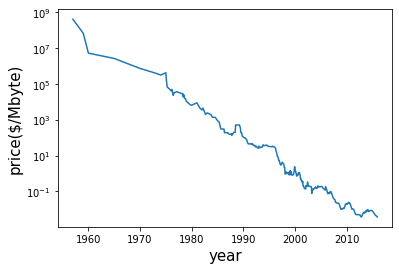

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

#y축 로그 스케일
plt.semilogy(df['date'], df['price'])
plt.xlabel('year', size=15)
plt.ylabel('price($/Mbyte)', size=15)

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

X_train0 = df[df['date'] < 2000]
X_test = df[df['date'] >= 2000]

X_train = X_train0['date'][:, None]
y_train = np.log(X_train0['price'])

tree = DecisionTreeRegressor().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)

<ipython-input-5-85f705d86f8a>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train0['date'][:, None]


In [8]:
x_all = np.array(df['date']).reshape(-1,1)

pred_tree = tree.predict(x_all)
price_tree = np.exp(pred_tree)

pred_lr = lr.predict(x_all)
price_lr = np.exp(pred_lr)

Text(0, 0.5, 'price ($/Mbyte)')

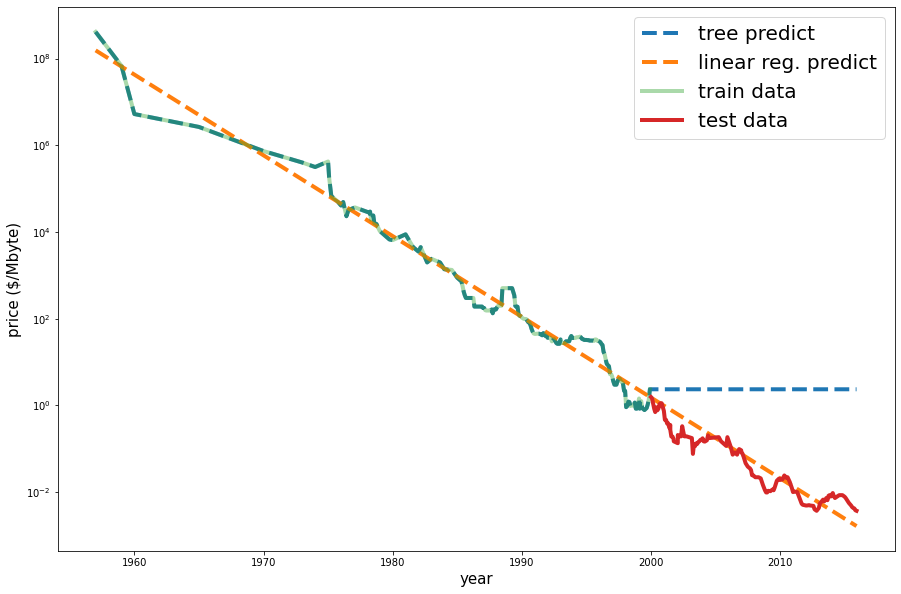

In [13]:
plt.figure(figsize=(15,10))
plt.semilogy(df['date'], price_tree, label='tree predict', lw='4', ls='--')
plt.semilogy(df['date'], price_lr, label='linear reg. predict', lw='4', ls='--')
plt.semilogy(X_train0['date'], X_train0['price'], label='train data', lw='4', alpha=0.4)
plt.semilogy(X_test['date'], X_test['price'], lw='4', label='test data')
plt.legend(loc=1, fontsize=20)
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)